In [1]:
# most of the time we deal with timeseries data
# this code will take datetime data and pollutant data and five average concentration over season, monthly and yearly variation

# xlsx file creates sometime some issue so i have concerted them into csv format
import pandas as pd
import os
import numpy as np

#cutting required data timeline from data
# input dezired starting date and end date
d1 = pd.to_datetime("2017-10-04", format="%Y-%m-%d")
d2 =  pd.to_datetime("2023-01-15", format="%Y-%m-%d")

# loading the dataset, sometime XLXS file will give wrong datetime, then use csv file
df = pd.read_excel("D:/air quality/OneDrive - design.iitd.ac.in/Desktop/New folder/Jodhpur data/jodhpur_all_government.xlsx", dtype="str")

# sometimes the data contains None, converting them into NaN because python can easily hansle NaN
df.replace('None',np.nan, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df["datetime"] = pd.to_datetime(df["datetime"], format="%d-%m-%Y %H:%M")
df[df.columns[1:]] = df[df.columns[1:]].astype("float64")
mask = (df.datetime >= d1) & (df.datetime <= d2)
df=df[mask].reset_index(drop=True)
df

,datetime,PM2_5,PM10,Temp,RH,WS,WD
0,2017-10-10 00:00:00,175.14,332.45,NaN,38.17,0.05,154.40
1,2017-10-10 01:00:00,153.46,288.45,NaN,39.11,0.15,192.78
2,2017-10-10 02:00:00,122.32,235.53,NaN,38.89,0.04,212.40
3,2017-10-10 03:00:00,97.94,193.35,NaN,40.15,0.15,181.74
4,2017-10-10 04:00:00,96.50,185.50,NaN,37.45,0.22,28.15
...,...,...,...,...,...,...,...
45452,2023-01-14 20:00:00,48.22,114.05,13.02,32.64,1.82,28.36
45453,2023-01-14 21:00:00,49.67,176.73,13.23,34.78,1.79,32.37
45454,2023-01-14 22:00:00,60.25,145.92,12.86,35.29,1.32,38.28
45455,2023-01-14 23:00:00,40.24,208.57,12.32,35.15,1.06,37.86


In [2]:
# grouping data by year, month then analysing according to that
#  groupby command
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month

# grouping by year
year_group= df.groupby(['year'])

# iterating through group and performing operation
for year, gruop in year_group:
    print(year)
    print(year_group.get_group(year).groupby('month').agg({'PM2_5':'mean','PM10':'mean', 'Temp':['mean','max','min']}))

2017
            PM2_5        PM10       Temp              
             mean        mean       mean    max    min
month                                                 
10     132.799444  217.686250  27.492222  37.83   6.78
11     131.643133  257.907776  25.162568  34.33  18.55
12     104.138608  259.882911  22.086507  34.00  10.77
2018
            PM2_5        PM10       Temp              
             mean        mean       mean    max    min
month                                                 
1      132.351289  286.624945  26.670085  44.80  13.29
2      111.823971  258.318713  29.621874  44.34  17.21
3      107.198667  234.432111  32.186577  44.02  16.76
4      112.409424  250.307402  34.323722  44.43  12.18
5      138.213616  286.023069  36.385113  46.55  16.17
6      108.616039  222.300188  34.085057  44.34  17.28
7       76.547435  164.343159  31.793717  43.32  16.75
8       86.054161  176.644585  31.749178  42.62  17.27
9       75.722163  156.013730  32.547951  42.34  11.50


In [3]:
# In low-cost sensor case most of the time we dont have hourly average data, then we need to convert them to hourly average

# import and clean sensirion data
# xlsx file creates sometime some issue so i have concerted them into csv format
import pandas as pd
import os
import numpy as np

#cutting required data timeline from data
d1 = pd.to_datetime("2022-12-01", format="%Y-%m-%d")
d2 =  pd.to_datetime("2022-12-31", format="%Y-%m-%d")
df = pd.read_csv("D:/air quality/OneDrive - design.iitd.ac.in/Desktop/New folder/R/honeywell.csv", dtype="str")
df['datetime'] = pd.to_datetime(df['datetime'])
df["datetime"] = pd.to_datetime(df["datetime"], format="%d-%m-%Y %H:%M")
df[df.columns[1:]] = df[df.columns[1:]].astype("float64")
mask = (df.datetime >= d1) & (df.datetime <= d2)
df=df[mask].reset_index(drop=True)
df['hour']=df['datetime'].dt.hour
df['date']=df['datetime'].dt.date
df=df.groupby(['date','hour']).agg(np.mean).reset_index()
df['date'] = df['date'].astype(str)
df['hour'] = df['hour'].astype(str)
df['datetime']=pd.to_datetime(df['date'] + ' ' + df['hour']+':'+'00'+':'+'00')
df=df.drop(['date','hour'], axis=1)
df

,H1,H2,H3,datetime
0,45.250000,54.000000,57.000000,2022-12-01 00:00:00
1,52.000000,61.250000,64.666667,2022-12-01 01:00:00
2,58.000000,63.250000,65.500000,2022-12-01 02:00:00
3,53.500000,65.750000,71.500000,2022-12-01 03:00:00
4,61.000000,75.500000,67.500000,2022-12-01 04:00:00
...,...,...,...,...
685,118.500000,168.666667,165.000000,2022-12-30 19:00:00
686,124.250000,167.000000,171.000000,2022-12-30 20:00:00
687,112.666667,157.000000,159.000000,2022-12-30 21:00:00
688,91.333333,120.000000,129.750000,2022-12-30 22:00:00


In [ ]:
# merging multiple datasets together based on some common critera
from functools import reduce
df=reduce(lambda x,y: pd.merge(x,y, on='datetime', how='outer'), [sensirion,plantower, honeywell, jodhpur_clinic])
df

   index            datetime    pm         P1         P2         P3  \
0      0 2022-12-01 00:00:00  48.6  50.666667  52.000000  51.500000   
1      1 2022-12-01 01:00:00  51.8  58.666667  59.333333  57.250000   
2      2 2022-12-01 02:00:00  58.4  64.333333  61.750000  57.666667   
3      3 2022-12-01 03:00:00  62.6  70.000000  65.666667  58.500000   
4      4 2022-12-01 04:00:00  63.0  73.750000  73.333333  67.000000   
5      5 2022-12-01 05:00:00  78.3  81.333333  83.000000  80.250000   
6      6 2022-12-01 06:00:00  86.6  89.666667  88.333333  88.666667   
7      8 2022-12-01 08:00:00  85.3  88.250000  82.333333  78.333333   
8      9 2022-12-01 09:00:00  83.6  90.333333  86.250000  80.000000   
9     10 2022-12-01 10:00:00  73.7  82.333333  80.500000  80.000000   

          H1         H2         H3         S1         S2         S3  
0  45.250000  54.000000  57.000000  46.000000  48.500000  49.500000  
1  52.000000  61.250000  64.666667  60.750000  55.333333  55.250000  
2  58.00

MovieWriter imagemagick unavailable; using Pillow instead.


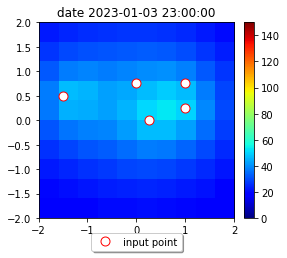

In [11]:
#  to animate spatial distribution of data
import pandas as pd
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)


# I like to position my colorbars this way, but you don't have to
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
coordinates = [[-1.5, 0.5], [0.25,0.0], [1.0,0.25], [1.0,0.75], [0.0,0.75]]
x = []
y = []
for i in coordinates:
        x.append(i[0])
        y.append(i[1])
# print(x)
# print(y)

df_xls = pd.read_excel("D:/air quality/OneDrive - design.iitd.ac.in/Desktop/New folder/R/cleaned/test/all.xlsx", index_col=False)

# print(df_xls.columns)

df_xls.drop(['pm2_5_governmentsite', 'PM10_governmentsite',
       'temp_governmentsite', 'humidity_governmentsite', 'ws', 'wd', 'robust',
       'robust.1', 'at', 'ah'], inplace=True, axis=1)
df_xls.dropna(inplace=True)
df_xls.reset_index(inplace=True, drop=False)


sensor = ['pm', 'P1', 'P2', 'S2', 'S3']
print(df_xls.head(10))
frames = []
sensList = []

for k in range(len(df_xls.P1)):
    data=[]
    for o in sensor:
        data.append(df_xls[f'{o}'][k])
    

    
   
#     print(data)
#     print(df_xls.dtypes)

    X = np.linspace(-2.0, 2.0,num = 10)
    Y = np.linspace(-2.0, 2.0,num = 10)

    X, Y = np.meshgrid(X,Y)  # 2D grid for interpolation
    interp = Rbf(x,y,data, function='inverse')
    Z=interp(X, Y)
    from scipy.interpolate import griddata

    grid_x, grid_y = np.ogrid[-3:2:10j, 0:2:10j]
    grid_z0 = griddata((x,y), data, (grid_x, grid_y), method='nearest')
#     print(Z)
    frames.append(Z)
    

cv0 = frames[0]
im = ax.imshow(cv0, origin='lower', cmap= 'jet', extent=(-2,2,-2,2))# Here make an AxesImage rather than contour

cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Frame 0')

ax.plot(x, y, "ow", label="input point", ms=9, mec='red')
box = ax.get_position()

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


    
ax.axis("equal")

def animate(i):
    arr = frames[i]
    vmax     = 150
    vmin     = 0
    im.set_data(arr)
    im.set_clim(vmin, vmax)
    tx.set_text('date {0}'.format(df_xls.datetime[i]))
    # In this version you don't have to do anything to the colorbar,
    # it updates itself when the mappable it watches (im) changes

ani = FuncAnimation(fig, animate, frames=len(frames))
ani.save('animationCase.mp4',writer='ffmpeg', dpi= 400)
ani.save(f'animationCase.gif', writer='imagemagick', dpi= 400)
plt.show()

